In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
#import numdifftools
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chi2
from scipy import integrate
from tqdm import tqdm

In [7]:
x = sym.Symbol("x",real=True)
y = sym.Symbol("y",real=True)
def f(x,y):
  return x+sym.I*y
z = f(x,y)
z

x + I*y

In [8]:
def f2 (z):
  return z**3 -1
f_im= f2(z)
f_im

(x + I*y)**3 - 1

In [75]:
F = [sym.re(f_im),sym.im(f_im)]
F[0]

x**3 - 3*x*y**2 - 1

In [76]:
F[1]

3*x**2*y - y**3

In [42]:
Jac = sym.matrices.Matrix([[sym.diff(F[0],x,1),sym.diff(F[0],y,1)],[sym.diff(F[1],x,1),sym.diff(F[1],y,1)]])
Jac

Matrix([
[3*x**2 - 3*y**2,          -6*x*y],
[          6*x*y, 3*x**2 - 3*y**2]])

In [78]:
Fn = sym.lambdify([x,y],F,"numpy")
Jaco = sym.lambdify([x,y],Jac,"numpy")

In [79]:
def Netwon_raphson(zn,Fn,Jaco,it_max=10000,tol=1e-7):
    error = 1
    it = 0
    while error > tol and it <= it_max:
      ocaJ = np.linalg.inv(Jaco(zn[0],zn[1]))
      Fnu = Fn(zn[0],zn[1])
      k = np.dot(ocaJ,Fnu)
      znu= zn - k
      error = np.linalg.norm (znu - zn)
      it += 1
      zn = znu
    if it == it_max:
        False
    else:
        return zn
    return znu
zn = np.array([0.5,0.5])
R = Netwon_raphson(zn,Fn,Jaco)
R

array([-0.5      ,  0.8660254])

In [94]:
N = 350
X = np.linspace(-1, 1, N)
Y = np.linspace(-1, 1, N)

In [95]:
S,A = np.meshgrid(x,y)

In [96]:
 Frac = np.zeros((N,N), np.int64)

In [97]:
sol_1 = np.array([-0.5, 0.8660254] )
sol_2 = np.array([-0.5, -0.8660254] )
sol_3 = np.array([1, 0.] )

In [107]:
for i in range(len(X)):
  for j in range(len(X)):
    zn = np.array([X[i],Y[j]])
    o = Netwon_raphson(zn,Fn,Jaco)
    #if round(o[0],2) == round(sol_1[0],2) and round(o[1],2) == round(sol_1[1],1):
    if o[1] < 0:
      Frac[i,j] = 100
    #if round(o[0],2) == round(sol_2[0],2) and round(o[1],2) == round(sol_2[1],2):
    if o[1] > 0:
      Frac[i,j] = 20
    if o[0] >0: 
      Frac[i,j] = 255


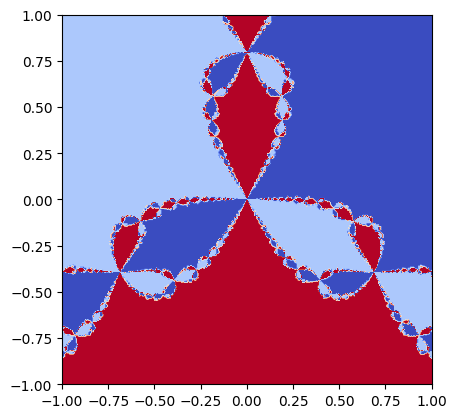

In [108]:
plt.imshow(Frac, cmap="coolwarm" ,extent=[-1,1,-1,1])